# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reestrucutrar el DataSet

In [2]:
df = pd.read_csv('labels.csv')

In [6]:
artist_genre = dict(zip(df['name'], df['genre']))

In [20]:
path = "/"
base_dir = 'images'
original =  'original'

for folder in os.listdir(original):
    folder_path = os.path.join(original, folder)
    
    if os.path.isdir(folder_path):
        artist = folder
        
        if artist in artist_genre:
            genre = artist_genre[artist]
            new_folder_path = os.path.join(base_dir, genre)
            os.makedirs(new_folder_path, exist_ok=True)

            # Mover contenido de la carpeta artista a la nueva ubicación
            for file in os.listdir(folder_path):
                if file.endswith('.jpg'):
                    file_path = os.path.join(folder_path, file)
                    shutil.copy(file_path, new_folder_path)

# Split de test y train

In [21]:
path = "/"
base_dir = 'model'
images =  'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_split = 0.8 

# Lista de carpetas en el dataset images
folder_group = [name for name in os.listdir(images) if os.path.isdir(os.path.join(images, name))]

# Crear las carpetas de train y test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterar sobre cada carpeta de los grupos
for folder in folder_group:
    folder_path = os.path.join(images, folder)
    images_list = os.listdir(folder_path)
    
    # Número de imágenes a incluir en test
    train_images_num = int(len(images_list) * train_split)
    
    # Mezclar las imágenes
    random.shuffle(images_list)
    
    # Dividir las imágenes en conjuntos de train y test
    train_list = images_list[:train_images_num]
    test_list = images_list[train_images_num:]

    # Crear subcarpetas en las carpetas de destino
    train_folder = os.path.join(train_dir, folder)
    test_folder = os.path.join(test_dir, folder)
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)
    
    # Mover las imágenes a las carpetas
    for image in train_list:
        origin = os.path.join(folder_path, image)
        destiny = os.path.join(train_dir, folder, image)
        shutil.copy(origin, destiny)
    
    for image in test_list:
        origin = os.path.join(folder_path, image)
        destiny = os.path.join(test_dir, folder, image)
        shutil.copy(origin, destiny)

# Data Augmentation

In [22]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)

In [23]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)

Found 4555 images belonging to 11 classes.


(8, 150, 150, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

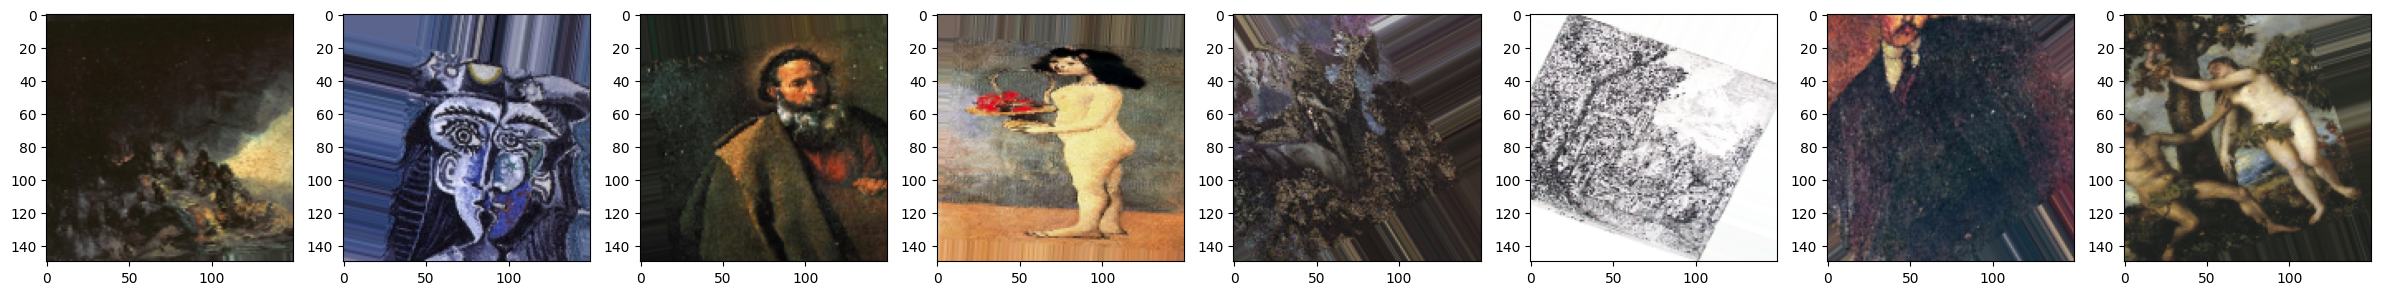

In [24]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

# Modelo Base

In [27]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(11,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_1 (Flatten)         (None, 219040)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               56074496  
                                                                 
 dense_3 (Dense)             (None, 11)                2827      
                                                                 
Total params: 56,077,603
Trainable params: 56,077,603
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
570/570 [==============================] - 222s 389ms/step - loss: 2.4574 - acc: 0.1363
Epoch 2/10
570/570 [==============================] - 223s 392ms/step - loss: 2.3258 - acc: 0.1644
Epoch 3/10
570/570 [==============================] - 243s 425ms/step - loss: 2.2733 - acc: 0.1945
Epoch 4/10
570/570 [==============================] - 254s 446ms/step - loss: 2.2337 - acc: 0.2213
Epoch 5/10
570/570 [==============================] - 246s 431ms/step - loss: 2.2057 - acc: 0.2378
Epoch 6/10
570/570 [==============================] - 224s 393ms/step - loss: 2.1811 - acc: 0.2509
Epoch 7/10
570/570 [==============================] - 225s 394ms/step - loss: 2.1541 - acc: 0.2588
Epoch 8/10
570/570 [==============================] - 225s 394ms/step - loss: 2.1342 - acc: 0.2654
Epoch 9/10
570/570 [==============================] - 224s 393ms/step - loss: 2.1115 - acc: 0.2729
Epoch 10/10
570/570 [==============================] - 224s 393ms/step - loss: 2.0832 - acc: 0.2812


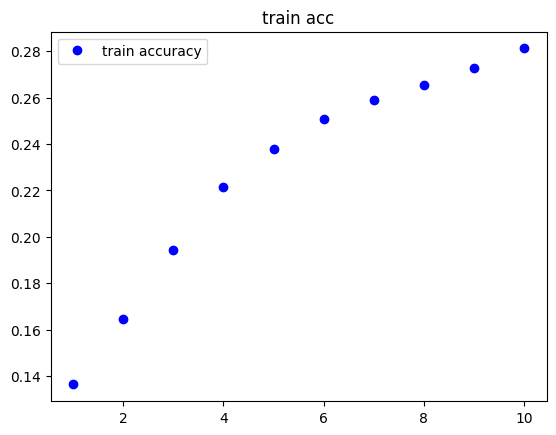

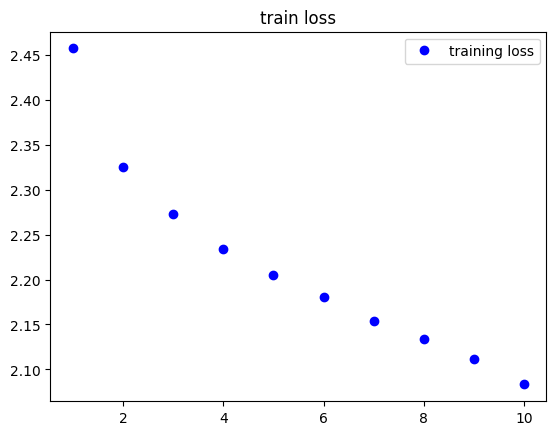

In [28]:
history = model.fit(
					train_generator, 
					epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [29]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 1145 images belonging to 11 classes.


c:\Users\quiqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 [==============================] - 3s 132ms/step - loss: 346.3197 - acc: 0.1180

test acc :
 0.11800000071525574


# Segundo Modelo

In [30]:
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
conv_base= VGG16(weights='imagenet',
				include_top = False,
				input_shape = (150,150,3))

In [33]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dense(11,activation='softmax'))

conv_base.trainable = False

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 11)                2827      
                                                                 
Total params: 16,814,923
Trainable params: 2,100,235
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
model2.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=1e-5),
						metrics=['acc'])

Epoch 1/10
570/570 [==============================] - 178s 312ms/step - loss: 2.2952 - acc: 0.1846
Epoch 2/10
570/570 [==============================] - 209s 367ms/step - loss: 2.1291 - acc: 0.2659
Epoch 3/10
570/570 [==============================] - 209s 367ms/step - loss: 2.0218 - acc: 0.3249
Epoch 4/10
570/570 [==============================] - 210s 368ms/step - loss: 1.9573 - acc: 0.3394
Epoch 5/10
570/570 [==============================] - 210s 368ms/step - loss: 1.8947 - acc: 0.3666
Epoch 6/10
570/570 [==============================] - 210s 368ms/step - loss: 1.8668 - acc: 0.3715
Epoch 7/10
570/570 [==============================] - 209s 367ms/step - loss: 1.8385 - acc: 0.3807
Epoch 8/10
570/570 [==============================] - 216s 380ms/step - loss: 1.8011 - acc: 0.3960
Epoch 9/10
570/570 [==============================] - 213s 373ms/step - loss: 1.7782 - acc: 0.4081
Epoch 10/10
570/570 [==============================] - 209s 367ms/step - loss: 1.7579 - acc: 0.4158


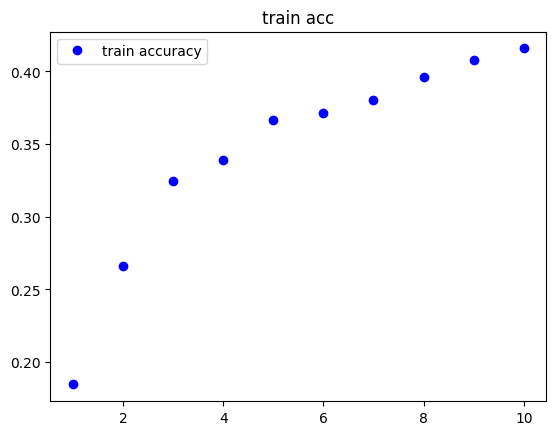

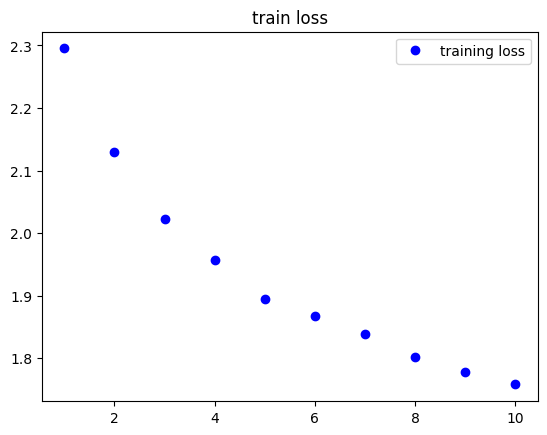

In [35]:
history = model2.fit(train_generator, 
				#steps_per_epoch = 65, 
				epochs = 10,)

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [36]:
test_loss, test_acc = model2.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

25/25 [==============================] - 22s 866ms/step - loss: 42.2334 - acc: 0.1680

test acc :
 0.1679999977350235
